In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

## Utils

In [2]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Reds):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    #plt.ylim([4.5, -0.5]) # solve squished issue

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix!")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i , cm[i, j],
                horizontalalignment = "center",
                color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  
def calculate_acc(cm):
  total = 0
  ok = 0
  row, col = cm.shape
  for i in range(row):
    for j in range(col):
      if i == j:
        total = total + cm[i,j]
        ok = ok + cm[i,j]
      else:
        total = total + cm[i,j]
  return print("accuracy:", round(ok/total,3))

def calculate_metrics(cm):
  FP = cm.sum(axis=0) - np.diag(cm) 
  FN = cm.sum(axis=1) - np.diag(cm)
  TP = np.diag(cm)
  TN = cm.sum() - (FP + FN + TP)
  # Sensitivity, recall, or true positive rate
  TPR = TP/(TP+FN)
  print("Sensitivity/Recall for each class:", np.round(TPR,2))
  print("Sensitivity/Recall:", round(np.mean(TPR),3))
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  print("Specificity for each class:", np.round(TNR,2))
  print("Specificity:", round(np.mean(TNR),3))
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  print("Precision (PPV) for each class:", np.round(PPV,2))
  print("Precision (PPV):", round(np.mean(PPV),3))
  # Negative predictive value
  NPV = TN/(TN+FN)
  print("Negative predictive value for each class:", np.round(NPV,2))
  print("Negative predictive value:", round(np.mean(NPV),3))

  # # Overall accuracy for each class
  # ACC = (TP+TN)/(TP+FP+FN+TN)
  # print("Accuracy for each class:", ACC)
  # print("Accuracy:", round(np.mean(ACC),3))

  # # recall(sensitivity)
  # recall = np.diag(cm) / np.sum(cm, axis = 1)
  # #precision
  # precision = np.diag(cm) / np.sum(cm, axis = 0)

## UNet

total patients: 89
Confusion matrix, without normalization
[[12  0  1]
 [ 3  4  3]
 [ 0  2 64]]
Sensitivity/Recall for each class: [0.92 0.4  0.97]
Sensitivity/Recall: 0.764
Specificity for each class: [0.96 0.97 0.83]
Specificity: 0.92
Precision for each class: [0.8  0.67 0.94]
Precision: 0.803
accuracy: 0.899


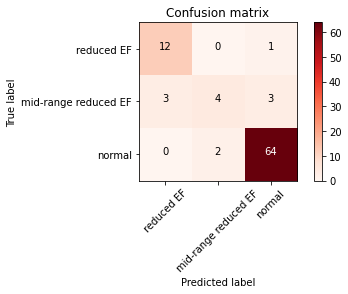

In [ ]:
# the label name list
cm_plot_labels = ['reduced EF', 'mid-range reduced EF', 'normal']

# get cm
cm = np.array([[12,0,1],[3,4,3],[0,2,64]])
print("total patients:", np.sum(cm))
plot_confusion_matrix(cm, cm_plot_labels)

# metrics
calculate_metrics(cm)
calculate_acc(cm)

## UNet with 2 class

total patients: 89
Confusion matrix, without normalization
[[12  1]
 [ 3 73]]
Sensitivity: 0.923
Specificity: 0.961
Accuracy: 0.955
Precision(PPV): 0.8
Negative predictive value: 0.986


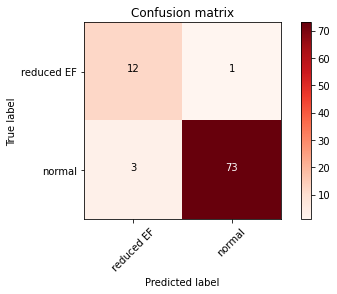

In [ ]:
# the label name list
cm_plot_labels = ['reduced EF', 'normal']

# get cm
cm = np.array([[12,1],[3,73]])
print("total patients:", np.sum(cm))
plot_confusion_matrix(cm, cm_plot_labels)

# metrics
FP = cm[1][0]
FN = cm[0][1]
TP = cm[0][0]
TN = cm[1][1]
# Sensitivity, recall
TPR = TP/(TP+FN)
print("Sensitivity:", round(TPR,3))
# Specificity
TNR = TN/(TN+FP) 
print("Specificity:", round(TNR,3))
# Accuracy 
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:", round(ACC,3))
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision(PPV):", round(PPV,3))
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value:", round(NPV,3))

## RWMA

total patients: 89
Confusion matrix, without normalization
[[49  1  1]
 [ 1  9  2]
 [ 1  0 25]]
Sensitivity/Recall for each class: [0.96 0.75 0.96]
Sensitivity/Recall: 0.891
Specificity for each class: [0.95 0.99 0.95]
Specificity: 0.962
Precision (PPV) for each class: [0.96 0.9  0.89]
Precision (PPV): 0.918
Negative predictive value for each class: [0.95 0.96 0.98]
Negative predictive value: 0.964
accuracy: 0.933


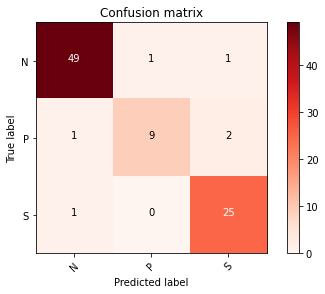

In [ ]:
# the label name list
cm_plot_labels = ['N', 'P', 'S']

# get cm
cm = np.array([[49,1,1],[1,9,2],[1,0,25]])
print("total patients:", np.sum(cm))
plot_confusion_matrix(cm, cm_plot_labels)

# metrics
calculate_metrics(cm)
calculate_acc(cm)

## Calculate CI

In [38]:
acc = 0.8
n = 89
# 95% CI z is 1.96
z = 1.96
interval = z * (acc*(1-acc)/n)**0.5
print(interval)
print(round(acc-interval,3),round(acc+interval,3))

0.08310383379249861
0.717 0.883


https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872
https://stats.stackexchange.com/questions/51296/how-do-you-calculate-precision-and-recall-for-multiclass-classification-using-co